**LAB 4.1**

# **A. Phát hiện trang web lừa đảo bằng kỹ thuật học máy**
***(Phishing Website Detection by Machine Learning Techniques)***

# **1. Mục tiêu:**
Website lừa đảo (phishing website) là một tấn công phi kỹ thuật (social engineering) bằng cách bắt trước các URL tin cậy. Mục tiêu bài thực hành sẽ đào tạo mô hình học máy và học sâu trên tập dữ liệu để dự đoán website lừa đảo. Cả 2 URL lừa đảo và lành tính (benign) được trích xuất thuộc tình từ thành phần cơ bản của website thành tập dữ liệu.
Dataset sử dụng trong Lab: https://drive.google.com/drive/folders/103bUK8pjFjqMGvTyT5MCiCtKCJnvgVkw?usp=sharing

# **2. Tải dữ liệu**
Các tính năng được trích xuất và lưu trữ trong tập tin csv.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/ColabNotebooks/Data_Lab4/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import ackages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data0 = pd.read_csv(data_dir + 'urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0.0,0.0,4590.0,1.0,0.0,0.0,0.0,0.0,0.0,2286.0,903.0,4375.0,0.0,0.0,1952.0,0.0,legitimate
1,ecnavi.jp,0.0,0.0,4590.0,1.0,1495.0,0.0,0.0,0.0,0.0,2286.0,903.0,4375.0,0.0,NaN,1952.0,0.0,legitimate
2,hubpages.com,0.0,0.0,4590.0,1.0,0.0,0.0,0.0,NaN,0.0,2286.0,NaN,4375.0,0.0,0.0,1952.0,0.0,legitimate
3,extratorrent.cc,0.0,0.0,4590.0,3.0,0.0,0.0,0.0,0.0,0.0,2286.0,0.0,4375.0,0.0,0.0,1952.0,0.0,legitimate
4,icicibank.com,0.0,0.0,4590.0,3.0,NaN,0.0,0.0,0.0,0.0,2286.0,0.0,4375.0,0.0,0.0,1952.0,0.0,legitimate


# **3. Làm quen với dữ liệu**
Dùng Dataframe để xem qua dữ liệu.

In [4]:
#Check shape
data0.shape

NameError: ignored

In [ ]:
#List features
data0.columns

In [ ]:
#Information
data0.info()

# **4. Trực quan hóa dữ liệu**
Một số biểu đồ hiển thị để tìm các phân phối dữ liệu và cách mỗi liên quan với nhau giữa các đối tượng. 

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [5]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

NameError: ignored

<Figure size 1500x1300 with 0 Axes>

# **5. Tiền xử lý dữ liệu & EDA**
Làm sạch dữ liệu bằng cách áp dụng các kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình.

In [6]:
data0.describe()

NameError: ignored

Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột  'Domain' & 'URL_Depth'. cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

In [ ]:
# Drop Domain column
data = data0.drop(['Domain'], axis = 1).copy()

Ta còn lại 16 thuộc tính và 1 cột phân loại. Giá trị tối đa của 'URL_Depth'  là 20. Ta cần chuẩn hoá cột này.

In [ ]:
# check data null 
data.isnull().sum()

Trong tập tin thuộc tính được trích xuất, các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

In [ ]:
data = data.fillna(data.mean(numeric_only=True)) #điền các giá trị thiếu (NaN) bằng giá trị trung bình của từng cột số
print(data.head()) # tính giá trị trung bình của các cột

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

# **6. Chia dữ liệu**

In [14]:
#features and target columns to X & y
Label = data['Label'] # Tách lấy cột Y và X
data_ = data.drop('Label',axis=1)
data_.shape, Label.shape

((10000, 16), (10000,))

In [15]:
# Lấy cột X đi normalize
# chuyển đổi các giá trị trong dữ liệu
# thành phạm vi [0, 1] dựa trên giá trị tối thiểu và tối đa của mỗi đặc trưng
from sklearn import preprocessing
X = preprocessing.MinMaxScaler().fit_transform(data_)
print("Normalized data:")
print(X)

Normalized data:
[[0.00672948 0.02706263 1.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         1.         ... 0.         0.         0.        ]
 [0.         0.02706263 1.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [16]:
from sklearn.preprocessing import LabelBinarizer

# Initialize and fit the LabelBinarizer
label_binarizer = LabelBinarizer()
label_binarizer.fit(Label)

# Transform labels to one-hot encoded vectors
y = label_binarizer.transform(Label)

print("One-hot encoded labels:")
print(y)

One-hot encoded labels:
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [17]:
# train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# **7. Đào tạo mô hình học máy**
Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## **7.1 Decision Tree Classifier**

In [20]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
#predicting 
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

***Đánh giá hiệu suất***

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

# Compute the precision
precision_train_tree = precision_score(y_train, y_train_tree)
precision_test_tree = precision_score(y_test, y_test_tree)

# Compute the recall
recall_train_tree = recall_score(y_train, y_train_tree)
recall_test_tree = recall_score(y_test, y_test_tree)

# Compute the F1 score
f1_train_tree = f1_score(y_train, y_train_tree)
f1_test_tree = f1_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: precision on test Data: {:.3f}".format(precision_test_tree))
print("Decision Tree: recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: recall on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: f1 on training Data: {:.3f}".format(f1_train_tree))
print("Decision Tree: f1 on test Data: {:.3f}".format(f1_test_tree ))

Decision Tree: Accuracy on training Data: 0.815
Decision Tree: Accuracy on test Data: 0.799
Decision Tree: precision on training Data: 0.972
Decision Tree: precision on test Data: 0.984
Decision Tree: recall on training Data: 0.647
Decision Tree: recall on test Data: 0.799
Decision Tree: f1 on training Data: 0.777
Decision Tree: f1 on test Data: 0.758


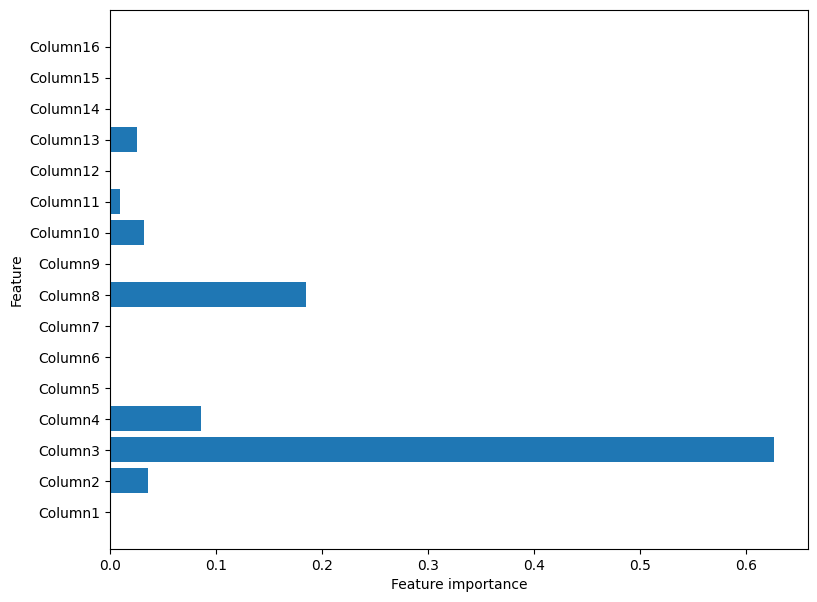

In [23]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
column_names = [f"Column{i+1}" for i in range(n_features)]
X_train = pd.DataFrame(X_train, columns=column_names)
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.yticks(range(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [24]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## **7.2 Random Forest Classifier**

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate 
forest = RandomForestClassifier(max_depth=5)

# fit 
forest.fit(X_train, y_train)

<ipython-input-25-5189fa74c379>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [26]:
#predicting 
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Đánh giá hiệu suất**

In [27]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)


# Compute the precision
precision_train = precision_score(y_train, y_train_forest)
precision_test = precision_score(y_test, y_test_forest)

# Compute the recall
recall_train = recall_score(y_train, y_train_forest)
recall_test = recall_score(y_test, y_test_forest)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_forest)
f1_test = f1_score(y_test, y_test_forest)

print("Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))

Accuracy on training Data: 0.819
Accuracy on test Data: 0.808
precision on training Data: 0.986
precision on test Data: 0.991
recall on training Data: 0.645
recall on test Data: 0.630
f1 on training Data: 0.780
f1 on test Data: 0.770


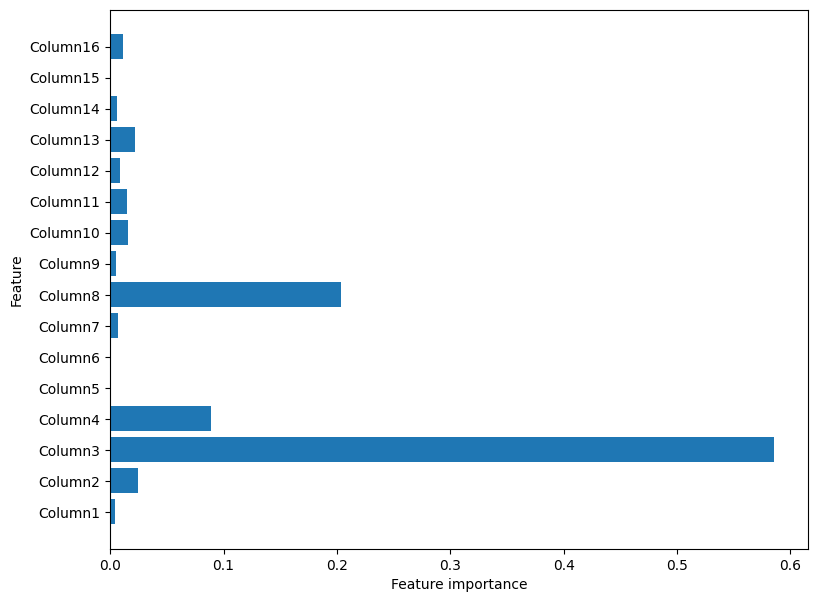

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Lưu trữ kết quả**

In [29]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##**7.3. Multilayer Perceptrons (MLPs) - Học sâu**

In [30]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate 
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit  
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [31]:
#predicting 
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


**Đánh giá hiệu suất**

In [32]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)


# Compute the precision
precision_train = precision_score(y_train, y_train_mlp)
precision_test = precision_score(y_test_mlp, y_test_mlp)

# Compute the recall
recall_train = recall_score(y_train, y_train_mlp)
recall_test = recall_score(y_test, y_test_mlp)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_mlp)
f1_test = f1_score(y_test, y_test_mlp)

print("Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))

Accuracy on training Data: 0.850
Accuracy on test Data: 0.837
precision on training Data: 0.959
precision on test Data: 1.000
recall on training Data: 0.730
recall on test Data: 0.708
f1 on training Data: 0.829
f1 on test Data: 0.816


**Lưu trữ kết quả**

In [33]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## **7.4. XGBoost Classifier**

In [34]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
#predicting 
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Đánh giá hiệu suất**

In [36]:
#computing the accuracy 
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)


# Compute the precision
precision_train = precision_score(y_train, y_train_xgb)
precision_test = precision_score(y_test, y_test_xgb)

# Compute the recall
recall_train = recall_score(y_train, y_train_xgb)
recall_test = recall_score(y_test, y_test_xgb)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_xgb)
f1_test = f1_score(y_test, y_test_xgb)

print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))
print("Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("Accuracy on test Data: {:.3f}".format(acc_test_xgb))

precision on training Data: 0.965
precision on test Data: 0.919
recall on training Data: 0.816
recall on test Data: 0.768
f1 on training Data: 0.884
f1 on test Data: 0.837
Accuracy on training Data: 0.894
Accuracy on test Data: 0.847


**Lưu trữ kết quả**

In [37]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **7.5. Autoencoder Neural Network**
***Bài tập số 1: Hoàn thành huấn luyến mô hình ANN.***

In [38]:
!sudo pip3 install keras
!sudo pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, LeakyReLU
from keras.models import Model
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support,  accuracy_score
import numpy as np
import pandas as pd

In [40]:
input_dim = X_train.shape[1]

class Defmodel(tf.keras.Model):
    def __init__(self, output, code_size=8):
        super().__init__()
        self.Defmodel = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(code_size, activation='relu')
        ])
        self.Defmodel2 = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(output, activation='sigmoid')
        ])
        
    def call(self, inputs):
        Defmodel = self.Defmodel(inputs)
        Defmodel2 = self.Defmodel2(Defmodel)
        return Defmodel2

# Create an instance of the autoencoder model
model = Defmodel(output=input_dim)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = model.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, X_test)
)

X_pred = model.predict(X_test)

# Calculate reconstruction error (e.g., mean squared error)
mse = np.mean(np.square(X_pred - X_test), axis=1)

# Set a threshold to classify instances as anomalous or normal
threshold = 0.2  # Adjust this threshold based on your data and requirements

# Convert the reconstruction error to binary labels
y_pred = np.where(mse > threshold, 1, 0)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/20
125/125 [==============================] - 2s 4ms/step - loss: 0.4020 - val_loss: 0.2382
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.2016 - val_loss: 0.1692
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.1413 - val_loss: 0.1245
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.1076 - val_loss: 0.1029
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0942 - val_loss: 0.0932
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.0867 - val_loss: 0.0875
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0824 - val_loss: 0.0838
Epoch 8/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.0827
Epoch 9/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0777 - val_loss: 0.0801
Epoch 10/20
125/125 [==============================] - 0s 2ms/step - loss: 0.0764 - val_loss: 0.0796

In [41]:
train_loss = model.evaluate(X_train, X_train)
test_loss = model.evaluate(X_test, X_test)

train_acc = train_loss
test_acc = test_loss

print('\nANNmodel: Training Data: {:.3f}'.format(train_acc))
print('ANNmodel: Test Data: {:.3f}'.format(test_acc))

storeResults('ANNmodel: ', train_acc, test_acc)

63/63 [==============================] - 0s 1ms/step - loss: 0.0704

ANNmodel: Training Data: 0.067
ANNmodel: Test Data: 0.070


## **7.6. Support Vector Machines**
***Bài tập số 2: Hoàn thành huấn luyến mô hình SVM.***

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_test_clf = clf.predict(X_test)
y_train_clf = clf.predict(X_train)

#computing the accuracy 
train_acc_clf = accuracy_score(y_train,y_train_clf)
test_acc_clf = accuracy_score(y_test,y_test_clf)

# Compute the precision
precision_train = precision_score(y_train, y_train_clf)
precision_test = precision_score(y_test, y_test_clf)

# Compute the recall
recall_train = recall_score(y_train, y_train_clf)
recall_test = recall_score(y_test, y_test_clf)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_clf)
f1_test = f1_score(y_test, y_test_clf)

print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))
print("XGBoost: Accuracy on training Data: {:.3f}".format(train_acc_clf))
print("XGBoost : Accuracy on test Data: {:.3f}".format(test_acc_clf))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


precision on training Data: 0.965
precision on test Data: 0.978
recall on training Data: 0.627
recall on test Data: 0.615
f1 on training Data: 0.760
f1 on test Data: 0.756
XGBoost: Accuracy on training Data: 0.803
XGBoost : Accuracy on test Data: 0.796


In [43]:
storeResults('SVM', train_acc, test_acc)

# **8. So sánh các mô hình**

***Bài tập số 3: Cho biết kết quả so sánh mô hình, sau đó viết code lưu trữ mô hình.***

In [44]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train precision': precision_train,
    'Test precision': precision_test,
    'Train recall': recall_train,
    'Test recall': recall_test,
    'Train f1': f1_train,
    'Test f1': f1_test})
results

,ML Model,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1,Test f1
0,Decision Tree,0.815,0.799,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
1,Random Forest,0.819,0.808,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
2,Multilayer Perceptrons,0.850,0.837,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
3,XGBoost,0.894,0.847,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
4,ANNmodel:,0.067,0.070,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
5,SVM,0.067,0.070,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556


In [45]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1,Test f1
3,XGBoost,0.894,0.847,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
2,Multilayer Perceptrons,0.850,0.837,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
1,Random Forest,0.819,0.808,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
0,Decision Tree,0.815,0.799,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
4,ANNmodel:,0.067,0.070,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556
5,SVM,0.067,0.070,0.964783,0.978227,0.626697,0.61546,0.759829,0.755556


In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open(data_dir+"XGBoostClassifier.dat", "wb"))

In [ ]:
# Save model Multilayer perceptrons
filename = 'mlp.pkl'
pickle.dump(mlp, open(data_dir+filename, 'wb'))

In [ ]:
# Save model Random forest
filename = 'forest.pkl'
pickle.dump(forest, open(data_dir+filename, 'wb'))

In [ ]:
# Save model Decision tree
filename = 'tree.pkl'
pickle.dump(tree, open(data_dir+filename, 'wb'))

In [ ]:
# Save model SVM
filename = 'clf.pkl'
pickle.dump(clf, open(data_dir+filename, 'wb'))

In [ ]:
# Save model ANN
# Save model architecture to JSON file
architecture_filename = 'model.json'
with open(architecture_filename, 'w') as json_file:
    json_file.write(model.to_json())
# Save model weights to HDF5 file
weights_filename = 'model.h5'
model.save_weights(weights_filename)

# **9. Trích dẫn**
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://mc.ai/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it/
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

**LAB 4.2**

# *B. Trích xuất thuộc tính trang web lừa đảo*
***(Phishing Website Detection Feature Extraction)***

# **1. Thu thập dữ liệu**
Ta cần 2 nhãn hớp pháp - legitimate (0) và lừa đảo - phishing (1).
Việc thu thập các url lừa đảo khá dễ dàng do nguồn mở có tên PhishTank. Dịch vụ này cung cấp một tập hợp các URL lừa đảo ở nhiều định dạng như csv, json, v.v. được cập nhật hàng giờ. Để tải xuống dữ liệu: https://www.phishtank.com/developer_info.php
Đối với các url hợp pháp, nguồn từ trường ĐH New Brunswick có sẵn các dạng benign, spam, phishing, malware & defacement URL  https://www.unb.ca/cic/datasets/url-2016.html. Số lượng URL hợp pháp là 35,300 'Benign_list.csv' 

## **1.1. Phishing URLs:**

In [7]:
import pandas as pd

In [8]:
#Download phishing URLs
!wget http://data.phishtank.com/data/online-valid.csv

URL transformed to HTTPS due to an HSTS policy
--2023-05-25 07:57:09--  https://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.17.177.85, 104.16.101.75, 2606:4700::6811:b155, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.17.177.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1685001439&Signature=bUAq6cu6gEO3N9d0TFRirsBdWj4cLTpSbcdPckR8iWi9RkHSy2YMmeA24Nd6qCpCY3AIRbfzcBbXRCyn0VRnqSszU4963cVOAHlcCzcdUlk1hCCOBBJDZpbl7hGZA2Fk9uiLitscKfgBBTIIC2C-g4zmVEkSXE5GNS8rPQlOz2ix9p0~0mcyBT7uud38CDptD8tXhYtVLU7vfjsZXPaTbnxnkpCLrP46EFRkk1eHtQcdvu~pVPr38o76OqaCzCORrC1zlbbHVxW78vraPUTAu0UGGGOMIQws4UnciD4g031mhL6oavOHDSotYNfZ3Cv49IthVc4~ydyBnKI5flki~A__&Key-Pair-Id=APKAILB45UG3RB4CSOJA [following]
--2023-05-25 07:57:09--  https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1685001439&Signature=bUAq6cu6gEO3N9d0TFRirsBdWj4cLTpSbcdPck

In [9]:
#Load CSV
data0 = pd.read_csv("online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8155426,https://cyoumbvmhe6y5jdt.cyou,http://www.phishtank.com/phish_detail.php?phis...,2023-05-25T04:02:16+00:00,yes,2023-05-25T04:13:01+00:00,yes,Other
1,8155425,https://1v5cx131kj53td1i3t.cyou,http://www.phishtank.com/phish_detail.php?phis...,2023-05-25T04:02:15+00:00,yes,2023-05-25T04:13:01+00:00,yes,Other
2,8155424,https://ur1ytj16f1j66bvc.cyou,http://www.phishtank.com/phish_detail.php?phis...,2023-05-25T04:02:13+00:00,yes,2023-05-25T04:13:01+00:00,yes,Other
3,8155423,https://1hf6d1h631h6.cyou,http://www.phishtank.com/phish_detail.php?phis...,2023-05-25T04:02:12+00:00,yes,2023-05-25T04:13:01+00:00,yes,Other
4,8155422,https://h1sr5j6tr1xcv3.cyou,http://www.phishtank.com/phish_detail.php?phis...,2023-05-25T04:02:11+00:00,yes,2023-05-25T04:13:01+00:00,yes,Other


In [49]:
data0.shape

(73175, 8)

Chọn ngẫu nhiên 5000 mẫu.

In [10]:
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8032132,http://verify-center56.strangled.net/verify,http://www.phishtank.com/phish_detail.php?phis...,2023-02-10T01:23:28+00:00,yes,2023-02-10T01:41:57+00:00,yes,Other
1,8116896,http://pscols.builderallwppro.com/swiss-pst/po...,http://www.phishtank.com/phish_detail.php?phis...,2023-04-14T07:16:47+00:00,yes,2023-04-14T07:25:37+00:00,yes,Other
2,8134068,https://wuqigiaiss.duckdns.org/,http://www.phishtank.com/phish_detail.php?phis...,2023-04-30T00:31:58+00:00,yes,2023-04-30T00:35:08+00:00,yes,Other
3,8054150,https://www.primosdistribuidora.com/,http://www.phishtank.com/phish_detail.php?phis...,2023-02-28T20:43:08+00:00,yes,2023-02-28T21:06:13+00:00,yes,Other
4,8145427,https://minilinks.ru/POCtA,http://www.phishtank.com/phish_detail.php?phis...,2023-05-14T12:45:12+00:00,yes,2023-05-14T12:52:57+00:00,yes,Other


In [11]:
phishurl.shape

(5000, 8)

## **1.2. Legitimate URLs:**

In [12]:
#Load legitimate files 
data1 = pd.read_csv(data_dir + "Benign_list.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [13]:
#Collec 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [14]:
legiurl.shape

(5000, 1)

# **2. Trích xuất thuộc tính**
Các thuộc tính sẽ được trích xuất phân loại thành:
* Address Bar 
* Domain
* HTML & Javascript 

## **2.1 Thuộc tính Address Bar**
Ta chỉ chọn một số thuộc tính cơ bản sau:
* Domain of URL
* IP Address in URL
* "@" Symbol in URL
* Length of URL
* Depth of URL
* Redirection "//" in URL
* "http/https" in Domain name
* Using URL Shortening Services “TinyURL”
* Prefix or Suffix "-" in Domain

In [15]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [16]:
# 1.Domain 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

In [17]:
# 2.Have_IP
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [18]:
# 3.Have_At (@)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [19]:
# 4.URL_Length
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [20]:
# 5.URL_Depth '/'
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [21]:
# 6.Redirection '//'
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [22]:
# 7. https_Domain
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [23]:
# 8. Checking Tiny_URL
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [24]:
# 9.Check Prefix or Suffix "-" in Domain
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

## **2.2 Thuộc tính Domain**
Các thể loại thuộc tính được trích xuất:
* DNS Record
* Website Traffic
* Age of Domain
* End Period of Domain

In [25]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [27]:
# 11.DNS_Record
# obtained in the featureExtraction function

In [28]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic 
def web_traffic(url):
    try:
        # Fill whitespaces in URL if any
        url = urllib.parse.quote(url)
        response = urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url, timeout=2)
        rank = BeautifulSoup(response.read(), "xml").find("REACH")['RANK']
        rank = int(rank)
    except (urllib.error.URLError, urllib.error.HTTPError) as e:
        print("Error accessing URL:", e)
        return 1
    except (KeyError, TypeError) as e:
        print("Error parsing response:", e)
        return 1

    if rank < 100000:
        return 1
    else:
        return 0

In [29]:
#Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [30]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

## **2.3 Thuộc tính HTML and JavaScript**
Các tập thuộc tính được trích xuất sau:
* IFrame Redirection
* Status Bar Customization
* Disabling Right Click
* Website Forwarding

In [31]:
import requests

In [32]:
# 15. IFrame
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [33]:
# 16.Check Mouse_Over
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [34]:
# 17.Check Right_Click
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [35]:
# 18.Check Web_Forwards    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

# **3. Tính toán thuộc tính URLs**
Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.

In [36]:
def featureExtraction(url,label):

  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features

## **3.1 URL hợp pháp**

In [37]:
legiurl.shape

(5000, 1)

In [38]:
legi_features = []
label = 0
for i in range(0, 500): # chạy quá lâu nên nhóm em giảm số lượng xuống để colab có thể chạy
  url = legiurl['URLs'][i]
  try:
    legi_features.append(featureExtraction(url,label)) # đã chỉnh sửa bỏ vào trong try except
  except:
    pass

Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error ac

In [39]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0


In [40]:
legitimate.to_csv('legitimate.csv', index= False)

## **3.2 URL lừa đảo**

In [41]:
phishurl.shape

(5000, 8)

In [42]:
phish_features = []
label = 1
for i in range(0, 100):
  url = phishurl['url'][i]
  try:
    phish_features.append(featureExtraction(url,label)) # đã chỉnh sửa bỏ vào trong try except
  except:
    pass

Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <urlopen error [Errno -2] Name or service not known>
Error accessing URL: <u

In [43]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,verify-center56.strangled.net,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1
1,pscols.builderallwppro.com,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,1,1
2,wuqigiaiss.duckdns.org,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
3,primosdistribuidora.com,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,minilinks.ru,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1


In [44]:
phishing.to_csv('phishing.csv', index= False)

# **4. Datasets**

In [45]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head(20)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,1,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,1,1,1,1,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,0


In [46]:
urldata.tail(20)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
580,bestchange.officialzeus.online,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1
581,sites.google.com,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,1
582,emmanuelmaldonado.com,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1
583,sempra-23.new-mentus.com,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1
584,visamir.com,0,0,0,3,0,0,0,0,0,1,0,0,1,1,1,1,1
585,ipfs.eth.aragon.network,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,1
586,dhl.039450349623534.id.yhsdf.com,0,0,1,2,0,0,0,0,0,1,0,0,1,1,1,1,1
587,buylefill.xyz,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
588,24seven.com.np,0,0,0,3,0,0,0,0,0,1,1,1,0,0,1,0,1
589,radhikamd.github.io,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1


In [47]:
urldata.shape

(600, 18)

In [48]:
urldata.to_csv('urldata.csv', index=False)

Ta trích xuất được 18 thuộc tính với 10,000 rows trong đó có  5000 phishing  & 5000 legitimate URL

***Bài tập số 3: Dựa vào mục trích xuất dữ liệu Lab 4.2, chọn một tập dataset khác thực hiện lại Lab 4.1***

# Bài tập

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Trích xuất thuộc tính



In [ ]:
# Bộ dữ liệu phishing lây theo gợi ý của bài, đường link để ở cuối bài
import numpy as np
from os.path import splitext
import ipaddress as ip
import sys
import re
import os
import matplotlib
import pandas as pd
import datetime
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Data_Lab4/phishing_site_urls.csv")
df.head(20)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

label = LabelEncoder()
Y = label.fit_transform(Y)

Y_df_encoded = pd.DataFrame(Y, columns=['Label'])
df = X.join([Y_df_encoded])

data= df.sample(frac=1)
data = df.sample(frac=1).reset_index(drop=True)
data.head(20)

,URL,Label
0,mp3bear.com/?q=shiraz+jihad+akel,1
1,metafilter.com/88019/See-Spot-Run,1
2,www.ranchguide.com/fouroaks/,1
3,cpro20222.publiccloud.com.br/Process_windows_s...,0
4,silent9.zapto.org:7895,0
5,nutsie.com/music/Digital%20Underground,1
6,shseed.com/css/?ref=us.battle.net/d3/en/index,0
7,circadianinfo.com/landing/2011_Memphis_Airline...,1
8,one.guilerty.biz/x7u6et4n6z\nwww.changeagentst...,0
9,en-gb.facebook.com/7deuce,1


In [ ]:
data0=df.loc[df['Label'] == 0]
data0.shape

(156422, 2)

In [ ]:
data1=df.loc[df['Label'] == 1]
data1.shape

(392924, 2)

In [ ]:
legiurl = data0.sample(n = 15000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head(20)

,URL,Label
0,kekjacint.hu/67j5hg,0
1,freetefillin.com/di.htm,0
2,poukjdcnatd.info/information.cgi,0
3,ingonline-nl-bk.expreewebbkonline.com/Home/nl/...,0
4,secureupdatecentere.altervista.org/please.php,0
5,91.214.71.101/data/info.php,0
6,91.239.25.133:6892,0
7,ocbclbaakaloambo.com /,0
8,fairflowers.ca/wp-includes/images/login/,0
9,www.vencerelcancer.org/pdf/comite/en-GB/cafb77...,0


In [ ]:
phishurl = data1.sample(n = 15000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head(20)

,URL,Label
0,en.wikipedia.org/wiki/Category:David_Usher_albums,1
1,experiencefestival.com/a/Saint_Denis_Basilica/...,1
2,montrealjourney.com/saint-josephs-oratory-of-m...,1
3,clinchem.org/cgi/reprint/54/3/461,1
4,sports-reference.com/olympics/summer/2008/,1
5,montrealgazette.com/sports/Dollas+brings+gift+...,1
6,legacy.com/obituaries/thestar/obituary.aspx?n=...,1
7,www.abb.com/railway,1
8,gazette.unc.edu/archives/99sep01/file.14.html,1
9,superpages.com/bp/Oakland-CA/Senator-LONI-Hanc...,1


## Trích xuất thuộc tính
### Các thuộc tính sẽ được trích xuất phân loại thành:

#### Address Bar ta chỉ chọn một số thuộc tính cơ bản sau:
+ Domain of URL
+ IP Address in URL
+ "@" Symbol in URL
+ Length of URL
+ Depth of URL
+ Redirection "//" in URL
+ "http/https" in Domain name
+ Using URL Shortening Services “TinyURL”
+ Prefix or Suffix "-" in Domain
#### Domain các thể loại thuộc tính được trích xuất:
+ DNS Record
+ Website Traffic
+ Age of Domain
+ End Period of Domain
#### HTML & Javascript các tập thuộc tính được trích xuất sau:
+ IFrame Redirection
+ Status Bar Customization
+ Disabling Right Click
+ Website Forwarding

### Thuộc tính Address Bar

In [ ]:
import re
import ipaddress
from urllib.parse import urlparse,urlencode

def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

In [ ]:
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [ ]:
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [ ]:
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [ ]:
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1          
    else:
        return 0  

### Thuộc tính Domain

In [ ]:
!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103247 sha256=a1d794c73b57a554f5a8f44f1520d0e4309ccfa140281e7f1d551a60545e1115
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


In [ ]:
import re
from bs4 import BeautifulSoup
from datetime import datetime
import whois
import urllib
import urllib.request

In [ ]:
#Nếu thứ hạng của doamin <100000, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp).
# 12.Web traffic 
def web_traffic(url):
    try:
        # Fill whitespace in URL if any
        url = urllib.parse.quote(url)
        response = urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url, timeout=2)
        content = response.read()
        soup = BeautifulSoup(content, "xml")
        rank = soup.find("REACH")['RANK']
        rank = int(rank)
    except (urllib.error.URLError, TypeError, KeyError, ValueError, AttributeError) as e:
        print("An error occurred:", e)
        return 1
    
    if rank < 100000:
        return 1
    else:
        return 0

In [ ]:
# Nếu age of domain > 12 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 13.Survival time of domain (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [ ]:
# Nếu period of domain > 6 tháng, giá trị của tính năng này là 1 (lừa đảo) khác 0 (hợp pháp)
# 14.End time of domain (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

### Thuộc tính HTML and JavaScript

In [ ]:
import requests

def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [ ]:
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [ ]:
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [ ]:
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

## Tính toán thuộc tính URLs

In [ ]:
def featureExtraction(url,label):
# Tạo danh sách và một hàm gọi các hàm khác và lưu trữ tất cả các thuộc tính của URL vào list.
  features = []
  #Address bar features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript features (4)
  try:
    response = requests.get(url,timeout=2)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  
  return features

In [ ]:
print(featureExtraction('https://www.google.com.vn/?hl=vi&gws_rd=ssl',0))

Error trying to connect to socket: closing socket - [Errno -2] Name or service not known
An error occurred: <urlopen error [Errno -2] Name or service not known>
['google.com.vn', 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]


### URL hợp pháp

In [ ]:
legi_features = []
label = 0
for i in range(0, 15000):
  url = legiurl['URL'][i]
  try:
    legi_features.append(featureExtraction(url,label))
  except:
    pass
print(legi_features)

Streaming output truncated to the last 5000 lines.
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occurred: <urlopen error [Errno -2] Name or service not known>
An error occu

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head(30)


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
1,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
2,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
3,,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,1,0
4,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
5,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,0
6,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0
7,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0
8,,0,0,0,4,0,0,0,0,0,1,1,1,1,1,1,1,0
9,,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,1,0


In [ ]:
legitimate.to_csv('legitimate.csv', index= False)

### URL lừa đảo

In [ ]:
phishurl.shape

(15000, 2)

In [ ]:
phishurl.head(20)

,URL,Label
0,en.wikipedia.org/wiki/Category:David_Usher_albums,1
1,experiencefestival.com/a/Saint_Denis_Basilica/...,1
2,montrealjourney.com/saint-josephs-oratory-of-m...,1
3,clinchem.org/cgi/reprint/54/3/461,1
4,sports-reference.com/olympics/summer/2008/,1
5,montrealgazette.com/sports/Dollas+brings+gift+...,1
6,legacy.com/obituaries/thestar/obituary.aspx?n=...,1
7,www.abb.com/railway,1
8,gazette.unc.edu/archives/99sep01/file.14.html,1
9,superpages.com/bp/Oakland-CA/Senator-LONI-Hanc...,1


In [ ]:
phish_features = []
label = 1
for i in range(0, 15000):
  url = phishurl['URL'][i]
  try:
    phish_features.append(featureExtraction(url,label))
    print(i)
  except:
    pass

Streaming output truncated to the last 5000 lines.
An error occurred: <urlopen error [Errno -2] Name or service not known>
12500
An error occurred: <urlopen error [Errno -2] Name or service not known>
12501
An error occurred: <urlopen error [Errno -2] Name or service not known>
12502
An error occurred: <urlopen error [Errno -2] Name or service not known>
12503
An error occurred: <urlopen error [Errno -2] Name or service not known>
12504
An error occurred: <urlopen error [Errno -2] Name or service not known>
12505
An error occurred: <urlopen error [Errno -2] Name or service not known>
12506
An error occurred: <urlopen error [Errno -2] Name or service not known>
12507
An error occurred: <urlopen error [Errno -2] Name or service not known>
12508
An error occurred: <urlopen error [Errno -2] Name or service not known>
12509
An error occurred: <urlopen error [Errno -2] Name or service not known>
12510
An error occurred: <urlopen error [Errno -2] Name or service not known>
12511
An error occu

In [ ]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,1
1,,0,0,1,5,0,0,0,0,0,1,1,1,1,1,1,1,1
2,,0,0,1,2,0,0,0,0,0,1,1,1,1,1,1,1,1
3,,0,0,0,6,0,0,0,0,0,1,1,1,1,1,1,1,1
4,,0,0,0,4,0,0,0,0,0,1,1,1,1,1,1,1,1


In [ ]:
phishing.to_csv('phishing.csv', index= False)

## Data

In [ ]:
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head(20)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
1,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
2,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
3,,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,1,0
4,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,0
5,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,0
6,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0
7,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0
8,,0,0,0,4,0,0,0,0,0,1,1,1,1,1,1,1,0
9,,0,0,1,6,0,0,0,0,0,1,1,1,1,1,1,1,0


In [ ]:
print(urldata['Label'].value_counts())

0    15000
1    15000
Name: Label, dtype: int64


In [ ]:
urldata.tail(20)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
29980,,0,0,0,4,0,0,0,0,0,1,1,1,1,1,1,1,1
29981,,0,0,1,5,0,0,0,0,0,1,1,1,1,1,1,1,1
29982,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1
29983,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,1
29984,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,1
29985,,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,1,1
29986,,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,1
29987,,0,0,1,5,0,0,0,0,0,1,1,1,1,1,1,1,1
29988,,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1
29989,,0,0,0,2,0,0,0,0,0,1,1,1,1,1,1,1,1


In [ ]:
urldata.shape

(30000, 18)

In [ ]:
urldata.to_csv('urldata.csv', index=False)

# Huấn luyện mô hình

## Làm quen với dữ liệu

In [ ]:
data1=urldata

In [ ]:
data1['Have_IP']=data1['Have_IP'].astype(str).astype(int)
data1['Have_At']=data1['Have_At'].astype(str).astype(int)
data1['URL_Length']=data1['URL_Length'].astype(str).astype(int)
data1['URL_Depth']=data1['URL_Depth'].astype(str).astype(int)
data1['Redirection']=data1['Redirection'].astype(str).astype(int)
data1['https_Domain']=data1['https_Domain'].astype(str).astype(int)
data1['Prefix/Suffix']=data1['Prefix/Suffix'].astype(str).astype(int)
data1['DNS_Record']=data1['DNS_Record'].astype(str).astype(int)
data1['Web_Traffic']=data1['Web_Traffic'].astype(str).astype(int)
data1['Domain_Age']=data1['Domain_Age'].astype(str).astype(int)
data1['Domain_End']=data1['Domain_End'].astype(str).astype(int)
data1['iFrame']=data1['iFrame'].astype(str).astype(int)
data1['Mouse_Over']=data1['Mouse_Over'].astype(str).astype(int)
data1['Right_Click']=data1['Right_Click'].astype(str).astype(int)
data1['Web_Forwards']=data1['Web_Forwards'].astype(str).astype(int)
data1['Label']=data1['Label'].astype(str).astype(int)
data1['TinyURL']=data1['TinyURL'].astype(str).astype(int)

In [ ]:
data1.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         30000 non-null  object
 1   Have_IP        30000 non-null  int64 
 2   Have_At        30000 non-null  int64 
 3   URL_Length     30000 non-null  int64 
 4   URL_Depth      30000 non-null  int64 
 5   Redirection    30000 non-null  int64 
 6   https_Domain   30000 non-null  int64 
 7   TinyURL        30000 non-null  int64 
 8   Prefix/Suffix  30000 non-null  int64 
 9   DNS_Record     30000 non-null  int64 
 10  Web_Traffic    30000 non-null  int64 
 11  Domain_Age     30000 non-null  int64 
 12  Domain_End     30000 non-null  int64 
 13  iFrame         30000 non-null  int64 
 14  Mouse_Over     30000 non-null  int64 
 15  Right_Click    30000 non-null  int64 
 16  Web_Forwards   30000 non-null  int64 
 17  Label          30000 non-null  int64 
dtypes: int64(17), object(1)
me

## Trực quan hóa dữ liệu

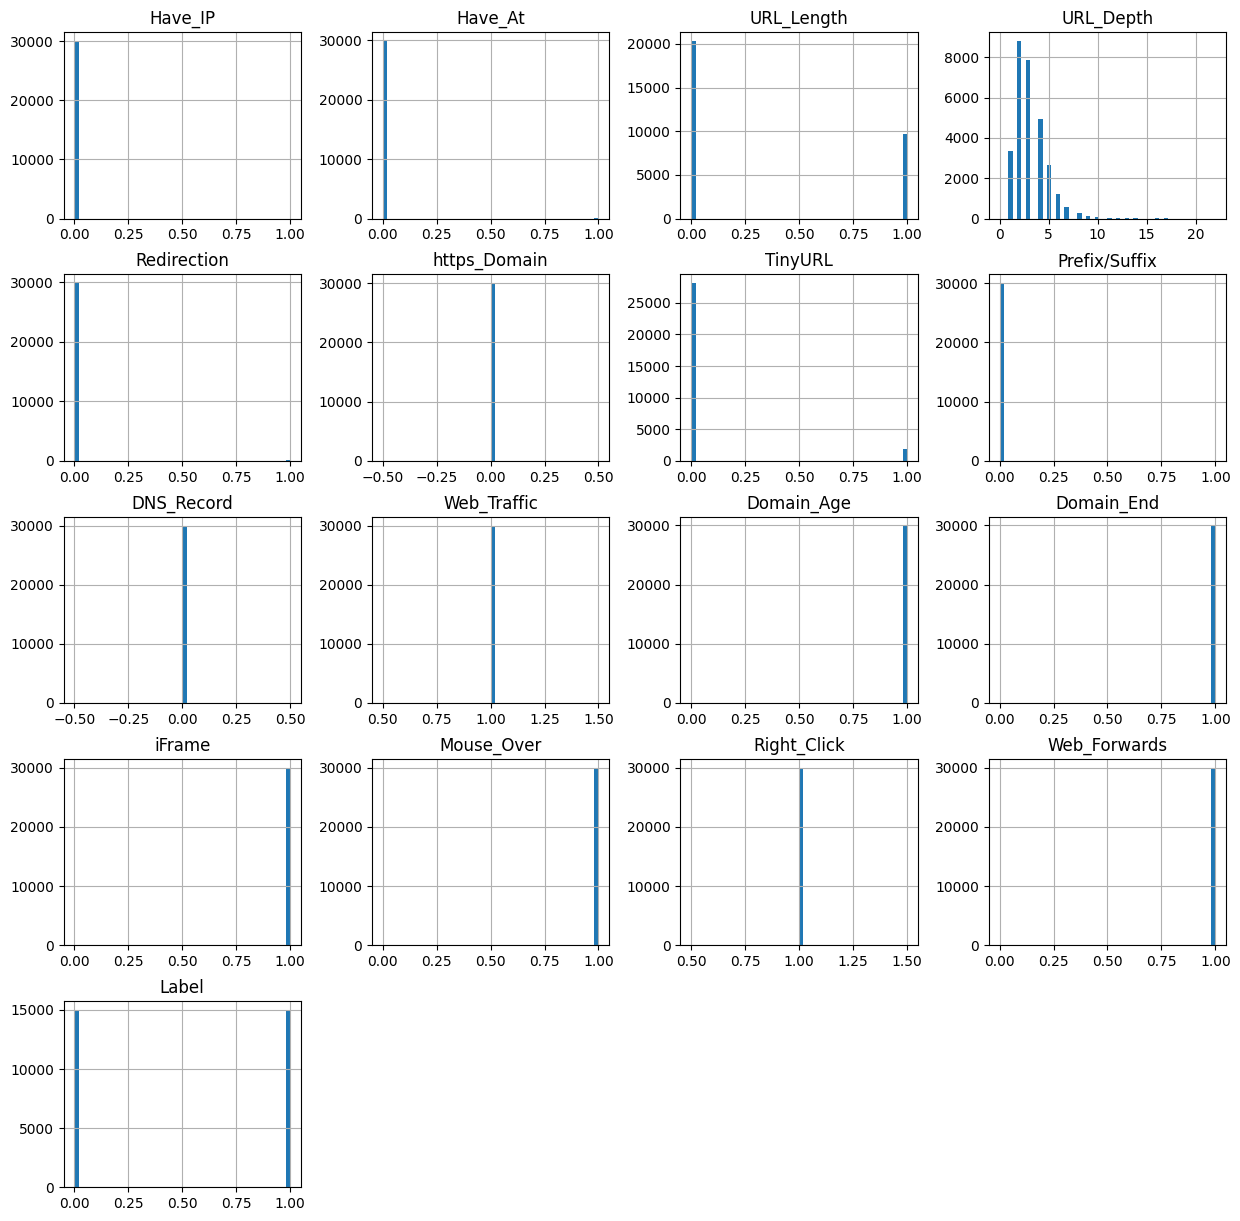

In [ ]:
data1.hist(bins = 50,figsize = (15,15))
plt.show()

<ipython-input-121-8e9073e466b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr())


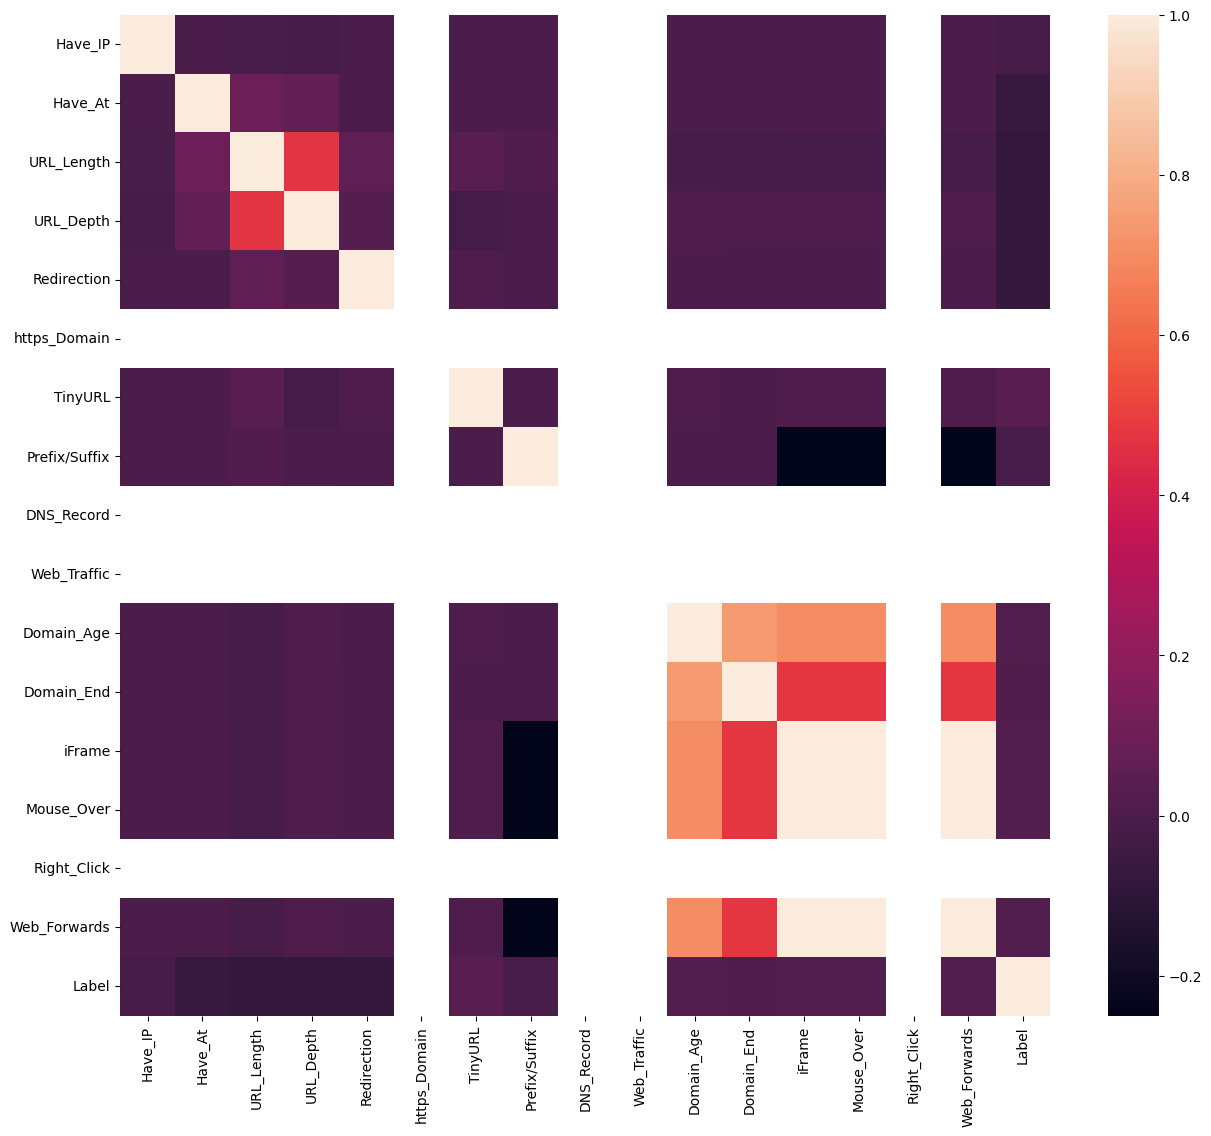

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data1.corr())
plt.show()

## Tiền xử lý dữ liệu & EDA

In [ ]:
data1.describe() 
# Làm sạch dữ liệu bằng cách áp dụng các 
# kỹ thuật tiền xử lý dữ liệu và chuyển đổi dữ liệu để sử dụng nó trong các mô hình

# Kết quả thu được ở trên cho thấy rằng hầu hết dữ liệu được tạo từ 0 và 1 ngời trừ cột 'Domain' & 'URL_Depth'.
# cột Domain hoàn toàn không có ý nghĩa gì để đào tạo mô hình nên loại nó.

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.000000
mean,0.000233,0.005433,0.322767,3.150533,0.005833,0.0,0.063700,0.000067,0.0,1.0,0.999700,0.999833,0.999733,0.999733,1.0,0.999733,0.500000
std,0.015274,0.073512,0.467542,1.668382,0.076154,0.0,0.244222,0.008165,0.0,0.0,0.017318,0.012909,0.016328,0.016328,0.0,0.016328,0.500008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,22.000000,1.000000,0.0,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:
# Ta còn lại 16 thuộc tính và 1 cột phân loại.
# Giá trị tối đa của 'URL_Depth' là 20. Ta cần chuẩn hoá cột này
data = data1.drop(['Domain'], axis = 1).copy()
data.isnull().sum()
# Trong tập tin thuộc tính được trích xuất,
# các thuộc tính được trích xuất của tập url lừa đảo và lành tính không có bất kỳ xáo trộn nào.

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,0
1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,5,0,0,0,0,0,1,1,1,1,1,1,1,1
3,0,0,1,5,0,0,0,0,0,1,1,1,1,1,1,1,0
4,0,0,0,3,0,0,0,0,0,1,1,1,1,1,1,1,0


## Chia dữ liệu

In [ ]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((30000, 16), (30000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((24000, 16), (6000, 16))

## Đào tạo mô hình học máy

Dữ liệu phù hợp với việc học có giám sát và hai bài toán nên áp dụng là classification - phân loại và regression - hồi quy.
Ta sẽ có 2 nhãn  phishing (1) và legitimate (0), với các mô hình học giám sát sau:
*  Decision Tree
*  Random Forest
*  Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

# Creating model results
ML_Model = []
acc_train = []
acc_test = []

#storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

###  Decision Tree Classifier

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate
tree = DecisionTreeClassifier(max_depth = 5)
# fit 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting 
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
#computing the accuracy
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

# Compute the precision
precision_train_tree = precision_score(y_train, y_train_tree)
precision_test_tree = precision_score(y_test, y_test_tree)

# Compute the recall
recall_train_tree = recall_score(y_train, y_train_tree)
recall_test_tree = recall_score(y_test, y_test_tree)

# Compute the F1 score
f1_train_tree = f1_score(y_train, y_train_tree)
f1_test_tree = f1_score(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: precision on test Data: {:.3f}".format(precision_test_tree))
print("Decision Tree: recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: recall on test Data: {:.3f}".format(acc_test_tree))
print("Decision Tree: f1 on training Data: {:.3f}".format(f1_train_tree))
print("Decision Tree: f1 on test Data: {:.3f}".format(f1_test_tree ))

Decision Tree: Accuracy on training Data: 0.568
Decision Tree: Accuracy on test Data: 0.560
Decision Tree: precision on training Data: 0.576
Decision Tree: precision on test Data: 0.580
Decision Tree: recall on training Data: 0.500
Decision Tree: recall on test Data: 0.560
Decision Tree: f1 on training Data: 0.535
Decision Tree: f1 on test Data: 0.526


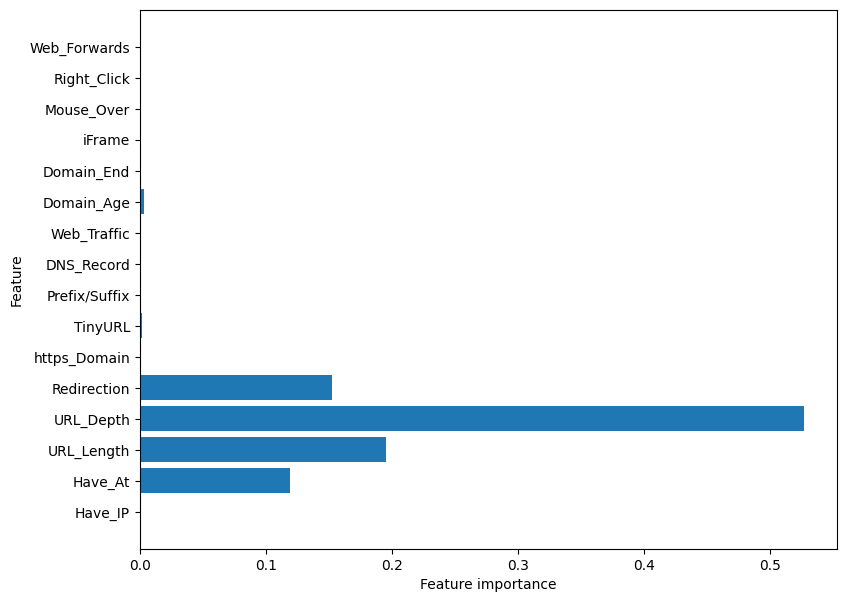

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Lưu trữ kết quả
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forest Classifier

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)


# Compute the precision
precision_train = precision_score(y_train, y_train_forest)
precision_test = precision_score(y_test, y_test_forest)

# Compute the recall
recall_train = recall_score(y_train, y_train_forest)
recall_test = recall_score(y_test, y_test_forest)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_forest)
f1_test = f1_score(y_test, y_test_forest)

print("Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Accuracy on test Data: {:.3f}".format(acc_test_forest))
print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))

Accuracy on training Data: 0.574
Accuracy on test Data: 0.566
precision on training Data: 0.580
precision on test Data: 0.583
recall on training Data: 0.524
recall on test Data: 0.508
f1 on training Data: 0.551
f1 on test Data: 0.543


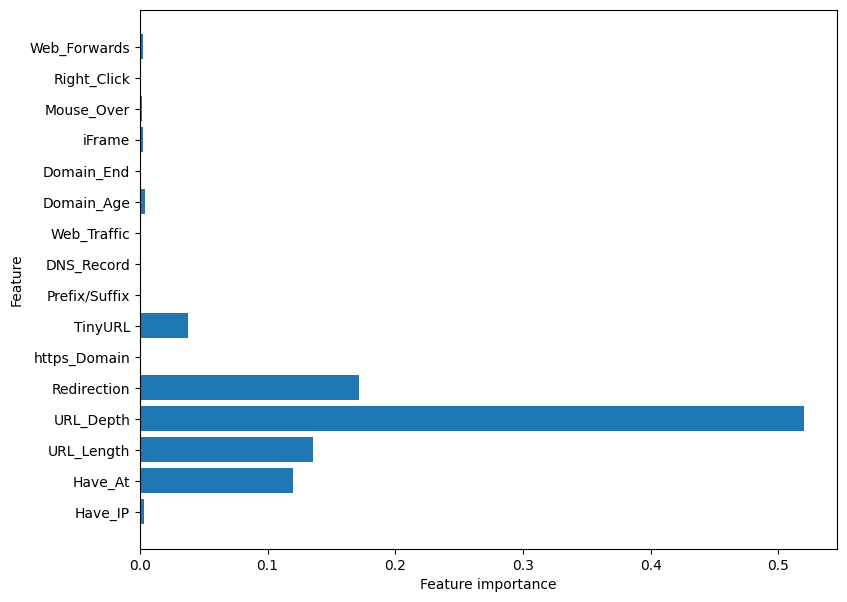

In [ ]:
# checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Lưu trữ kết quả
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy 
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)


# Compute the precision
precision_train = precision_score(y_train, y_train_xgb)
precision_test = precision_score(y_test, y_test_xgb)

# Compute the recall
recall_train = recall_score(y_train, y_train_xgb)
recall_test = recall_score(y_test, y_test_xgb)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_xgb)
f1_test = f1_score(y_test, y_test_xgb)

print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))
print("Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("Accuracy on test Data: {:.3f}".format(acc_test_xgb))

precision on training Data: 0.573
precision on test Data: 0.579
recall on training Data: 0.589
recall on test Data: 0.581
f1 on training Data: 0.581
f1 on test Data: 0.580
Accuracy on training Data: 0.577
Accuracy on test Data: 0.573


In [ ]:
# Lưu trữ kết quả
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### Multilayer Perceptrons (MLPs)

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100])) 
mlp.fit(X_train, y_train)
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
#computing the accuracy
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)


# Compute the precision
precision_train = precision_score(y_train, y_train_mlp)
precision_test = precision_score(y_test_mlp, y_test_mlp)

# Compute the recall
recall_train = recall_score(y_train, y_train_mlp)
recall_test = recall_score(y_test, y_test_mlp)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_mlp)
f1_test = f1_score(y_test, y_test_mlp)

print("Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))

Accuracy on training Data: 0.576
Accuracy on test Data: 0.574
precision on training Data: 0.565
precision on test Data: 1.000
recall on training Data: 0.654
recall on test Data: 0.645
f1 on training Data: 0.606
f1 on test Data: 0.606


In [ ]:
# Lưu trữ kết quả
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### ANN

In [ ]:
# Bài tập số 1: Hoàn thành huấn luyến mô hình ANN
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 14)                238       
                                                                 
 dense_37 (Dense)            (None, 16)                240       
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable par

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

X_pred = model.predict(X_test)

# Calculate reconstruction error (e.g., mean squared error)
mse = np.mean(np.square(X_pred - X_test), axis=1)

# Set a threshold to classify instances as anomalous or normal
threshold = 0.2  # Adjust this threshold based on your data and requirements

# Convert the reconstruction error to binary labels
y_pred = np.where(mse > threshold, 1, 0)

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/10
300/300 [==============================] - 6s 6ms/step - loss: 0.6021 - val_loss: 0.2546
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2086 - val_loss: 0.2490
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2031 - val_loss: 0.2422
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1979 - val_loss: 0.2411
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1975 - val_loss: 0.2406
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.1972 - val_loss: 0.2403
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1967 - val_loss: 0.2396
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1963 - val_loss: 0.2391
Epoch 9/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1959 - val_loss: 0.2390
Epoch 10/10
188/188 [==============================] - 1s 3ms/step
Accuracy: 0.49616666666666664
Pre

### Support Vector Machines

In [ ]:
### Bài tập số 2: Hoàn thành huấn luyến mô hình SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_test_clf = clf.predict(X_test)
y_train_clf = clf.predict(X_train)

In [ ]:
#computing the accuracy 
train_acc_clf = accuracy_score(y_train,y_train_clf)
test_acc_clf = accuracy_score(y_test,y_test_clf)

# Compute the precision
precision_train = precision_score(y_train, y_train_clf)
precision_test = precision_score(y_test, y_test_clf)

# Compute the recall
recall_train = recall_score(y_train, y_train_clf)
recall_test = recall_score(y_test, y_test_clf)

# Compute the F1 score
f1_train = f1_score(y_train, y_train_clf)
f1_test = f1_score(y_test, y_test_clf)

print("precision on training Data: {:.3f}".format(precision_train))
print("precision on test Data: {:.3f}".format(precision_test))
print("recall on training Data: {:.3f}".format(recall_train))
print("recall on test Data: {:.3f}".format(recall_test))
print("f1 on training Data: {:.3f}".format(f1_train))
print("f1 on test Data: {:.3f}".format(f1_test))
print("XGBoost: Accuracy on training Data: {:.3f}".format(train_acc_clf))
print("XGBoost : Accuracy on test Data: {:.3f}".format(test_acc_clf))

precision on training Data: 0.528
precision on test Data: 0.541
recall on training Data: 0.718
recall on test Data: 0.711
f1 on training Data: 0.609
f1 on test Data: 0.614
XGBoost: Accuracy on training Data: 0.540
XGBoost : Accuracy on test Data: 0.547


In [ ]:
storeResults('SVM', train_acc_clf, test_acc_clf)

## So sánh các mô hình

In [ ]:
# Bài tập 3: so sánh mô hình và lưu model
# so sánh
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train precision': precision_train,
    'Test precision': precision_test,
    'Train recall': recall_train,
    'Test recall': recall_test,
    'Train f1': f1_train,
    'Test f1': f1_test})
results

,ML Model,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1,Test f1
0,Decision Tree,0.568,0.560,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
1,Random Forest,0.574,0.566,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
2,XGBoost,0.577,0.573,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
3,Multilayer Perceptrons,0.576,0.574,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
4,SVM,0.540,0.547,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446


In [ ]:
#Sort accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train precision,Test precision,Train recall,Test recall,Train f1,Test f1
3,Multilayer Perceptrons,0.576,0.574,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
2,XGBoost,0.577,0.573,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
1,Random Forest,0.574,0.566,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
0,Decision Tree,0.568,0.560,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446
4,SVM,0.540,0.547,0.528361,0.54098,0.717608,0.711002,0.608612,0.614446


In [ ]:
# Lưu mô hình
# save XGBoost model to file
import pickle
pickle.dump(xgb, open(data_dir+"XGBoostClassifier.dat", "wb"))

# Save model Multilayer perceptrons
filename = 'mlp.pkl'
pickle.dump(mlp, open(data_dir+filename, 'wb'))

# Save model Decision tree
filename = 'tree.pkl'
pickle.dump(tree, open(data_dir+filename, 'wb'))

# Save model Random forest
filename = 'forest.pkl'
pickle.dump(forest, open(data_dir+filename, 'wb'))

# Save model SVM
filename = 'clf.pkl'
pickle.dump(clf, open(data_dir+filename, 'wb'))

# Save model ANN
# Save model architecture to JSON file
architecture_filename = 'model.json'
with open(architecture_filename, 'w') as json_file:
    json_file.write(model.to_json())
# Save model weights to HDF5 file
weights_filename = 'model.h5'
model.save_weights(weights_filename)

# **5. Trích dẫn**

https://archive.ics.uci.edu/ml/datasets/Phishing+Websites

https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls?resource=download